In [442]:
import numpy as np
import math
from scipy.linalg import sqrtm
import matplotlib.pyplot as plt

In [443]:
def u():
    a = 1
    b = 3
    return np.random.uniform(a, b, 1)[0]

eps = 0.01

In [444]:
def u():
    return np.random.normal(2, 5, 1)[0]

eps = 0.01

In [107]:
mean = np.array([1, 2])
cov = np.array([[1, 1], [1, 1]])

def u():
    return np.random.multivariate_normal(mean, cov, 1)

In [254]:
base = np.array([[10, 1], [3, 4]])

def u():
    return base + 2 * np.random.normal(np.array([0, 0]), np.ones((2, 2)), size=(1, 2, 2))[0]

In [255]:
u()

array([[10.45909839,  5.04959902],
       [ 7.49204888,  5.56011157]])

In [256]:
np.linalg.inv(base)

array([[ 0.10810811, -0.02702703],
       [-0.08108108,  0.27027027]])

In [445]:
def m1(k):
    return sum(u() for _ in range(k)) / k

def m2(k):
    return sum(u()**2 for _ in range(k)) / k

def w(k):
    m1k = m1(k)
    return np.min([1 / k * m1k, m1k / m2(k), eps])


def p(k):
    wk = w(k)
    return 1 - np.sqrt(1 / k * sum((1 - wk * u())**2 for _ in range(k)))

def q(n, k):
    pk = p(k)
    return pk * (1 - pk) ** n

def beta(k, N):
    wk = w(k)
    qN = q(N, k)
    return wk / qN * np.prod([1 - wk * u() for _ in range(N)])

def naive(N):
    return 1 / np.mean([u() for _ in range(N)])

def naive2(N):
    return np.mean([1 / u() for _ in range(N)])

In [258]:
def m1(k):
    samples = [u() for _ in range()]
    return np.sum(samples, axis=0) / k

def m2(k):
    samples = [u() for _ in range(k)]
    summed = np.zeros((2, 2))
    for sample in samples:
        summed += sample.dot(sample)
    return summed / k

def w(k):
    return eps
    m1k = m1(k)
    return np.min([1 / k * m1k, m1k / m2(k), eps])


def p(k):
    wk = w(k)
    samples = [np.eye(2) - wk * u() for _ in range(k)]
    summed = np.zeros((2, 2))
    for sample in samples:
        summed += sample.dot(sample)
    
    return np.eye(2) - sqrtm(1 / k * summed)

def q(n, k):
    pk = p(k)
    qn = pk
    for _ in range(n):
        qn = qn.dot(np.eye(2) - pk)
    return qn

def beta(k, N):
    wk = w(k)
    qN = q(N, k)
    samples = [np.eye(2) - wk * u() for _ in range(N)]
    prod = samples[0]
    for sample in samples[1:]:
        prod = prod.dot(sample)
    return wk * np.linalg.inv(qN).dot(prod)

def naive(N):
    return np.linalg.inv(np.mean([u() for _ in range(N)], axis=0))

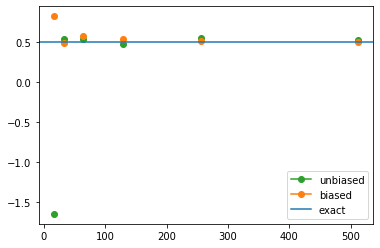

In [447]:
exact = np.linalg.inv(base)
exact = 1/2

for n in 2 ** np.arange(4, 10):
    beta_sample = np.mean([beta(n, n) for _ in range(1000)])
    naive_sample = np.mean([naive(n) for _ in range(1000)])
    
    if n == 2 ** 4:
        plt.plot(n, beta_sample, marker='o', color='tab:green', label='unbiased')
        plt.plot(n, naive_sample, marker='o', color='tab:orange', label='biased')
    else:
        plt.plot(n, beta_sample, marker='o', color='tab:green')
        plt.plot(n, naive_sample, marker='o', color='tab:orange')
    
plt.axhline(exact, label='exact')
plt.legend(loc='best')
    
#     plt.errorbar(n, np.mean(beta_errs), yerr=np.std(beta_errs), marker='o', color='tab:green')
#     plt.errorbar(n, np.mean(naive_errs), yerr=np.std(naive_errs), marker='o', color='tab:blue')

In [276]:
beta(1000, 1)

array([[ 0.10779232, -0.02863408],
       [-0.08016343,  0.26781071]])

In [275]:
naive(1000)

array([[ 0.10826602, -0.02592476],
       [-0.08116969,  0.26595243]])

In [179]:
a.dot(a)

array([[ 7,  6],
       [18, 19]])

In [177]:
np.prod([a, a], axis=0)

array([[ 4,  1],
       [ 9, 16]])

In [456]:
mu = 3
var = 2

def g(x):
    return x ** 2

def estimate(n):
    samples = np.random.normal(mu, var, n)
    return np.mean(samples)

def bestimate(n):
    samples = np.random.normal(mu, var, n)
    return np.mean(samples) + 1 / n 


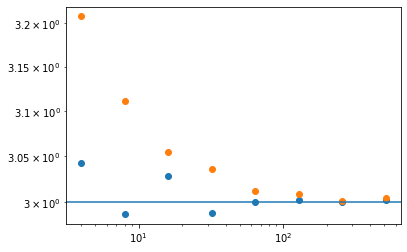

In [460]:
for n in 2 ** np.arange(2, 10):
    meang = np.mean([estimate(n) for _ in range(1000)])
    meanb = np.mean([bestimate(n) for _ in range(1000)])

    plt.loglog(n, meang, 'o', color='tab:blue')
    plt.loglog(n, meanb, 'o', color='tab:orange')

    
plt.axhline(mu)


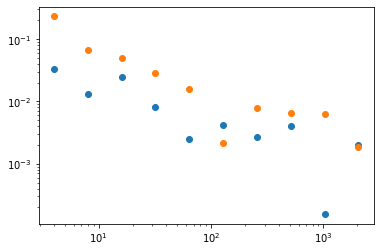

In [466]:
for n in 2 ** np.arange(2, 12):
    meang = np.mean([estimate(n) for _ in range(1000)])
    meanb = np.mean([bestimate(n) for _ in range(1000)])

    plt.loglog(n, np.abs(mu - meang), 'o', color='tab:blue')
    plt.loglog(n, np.abs(mu - meanb), 'o', color='tab:orange')

    

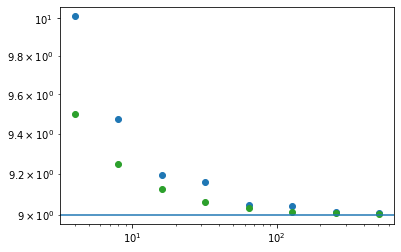

In [328]:
for n in 2 ** np.arange(2, 10):
    meang = np.mean([g(estimate(n)) for _ in range(10000)])
    plt.loglog(n, meang, 'o', color='tab:blue')
    plt.loglog(n, mu ** 2 + var / n, 'o', color='tab:green')
#     plt.loglog(n, mu ** 2 + 2 * mu * var / n, 'o', color='tab:orange')

    
plt.axhline(g(mu))
    

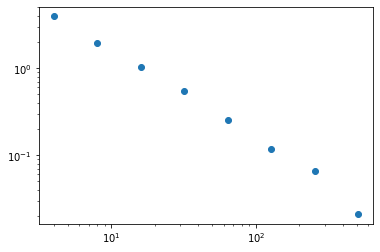

In [324]:
for n in 2 ** np.arange(2, 10):
    meang = np.mean([g(estimate(n)) for _ in range(10000)])
    plt.loglog(n, np.abs(meang - mu ** 2 + 2 * mu * var / n), 'o', color='tab:blue')


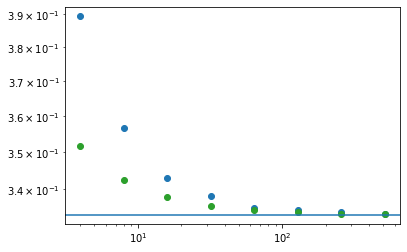

In [329]:
for n in 2 ** np.arange(2, 10):
    meang = np.mean([1 / estimate(n) for _ in range(10000)])
    plt.loglog(n, meang, 'o', color='tab:blue')
    plt.loglog(n, 1 / mu + var / (n * mu ** 3), 'o', color='tab:green')

    
plt.axhline(1 / mu)

In [ ]:
def u():
    return

In [435]:
def N():
    return np.random.randint(1, 5, 1)[0]

def p(n):
    return 1 / 5

# def g(x, n):
#     if n == 0:
#         return 1 / x
    
#     return n * (-1) ** n / (x ** (n + 1))

def g(x, n):
    if n == 0:
        return x ** 2
    elif n == 1:
        return 2 * x
    elif n == 2:
        return 2
    return 0

def V(x, n):
    samples = np.random.normal(mu, var, n)
    pn = p(n)
    nfac = math.factorial(n)
#     print(n, nfac)
    return g(x, n) / nfac * np.prod(samples - x) / pn

In [439]:
x = np.mean(np.random.normal(mu, var, n)) ** 2
Ns = [N() for _  in range(100)]
np.mean([V(x, int(Ns_i)) for Ns_i in Ns])

-91.32752217673789